In [25]:
# Importamos los módulos a utilizar
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency


# Leemos el dataset
data = pd.read_csv('./Laboratorio2/responses.csv')
data.describe()

Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical music      Musical          Pop         Rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845     1.161400     1.184861   
min       1.000000         1.000000     1.000000     1.000000     1.000000   
25%       1.000000         2.000000     2.000000     3.000000     3.000000   
50%       2.000000         3.000000     3.000000     4.000000     4.000000   
75%       3.000000         4.000000     4.000000     4.000000     5.000000   
max       5.000000         5.000000     5.000000     5.000000     5.000000   

       Metal or Hardrock         ...          Shopping centres  \
count        1007.000000         ...               1008.000000   
mean            2.361470         ...                  3.234127   
std             1.372995         ...                  1.323062   
min             1.000000         ...                  1.000000   
25%             1.000000         ...                  2.000000   
50%             2.000000         ...                  3.000000   
75%             3.000000         ...                  4.000000   
max             5.000000         ...                  5.000000   

       Branded clothing  Entertainment spending  Spending on looks  \
count       1008.000000             1007.000000        1007.000000   
mean           3.050595                3.201589           3.106256   
std            1.306321                1.188947           1.205368   
min            1.000000                1.000000           1.000000   
25%            2.000000                2.000000           2.000000   
50%            3.000000                3.000000           3.000000   
75%            4.000000                4.000000           4.000000   
max            5.000000                5.000000           5.000000   

       Spending on gadgets  Spending on healthy eating          Age  \
count          1010.000000                  1008.00000  1003.000000   
mean              2.870297                     3.55754    20.433699   
std               1.284970                     1.09375     2.828840   
min               1.000000                     1.00000    15.000000   
25%               2.000000                     3.00000    19.000000   
50%               3.000000                     4.00000    20.000000   
75%               4.000000                     4.00000    22.000000   
max               5.000000                     5.00000    30.000000   

           Height      Weight  Number of siblings  
count  990.000000  990.000000         1004.000000  
mean   173.514141   66.405051            1.297809  
std     10.024505   13.839561            1.013348  
min     62.000000   41.000000            0.000000  
25%    167.000000   55.000000            1.000000  
50%    173.000000   64.000000            1.000000  
75%    180.000000   75.000000            2.000000  
max    203.000000  165.000000           10.000000  

[8 rows x 139 columns]

**Calculos y graficos para nuestro laboratorio**

**Calculo de la Chi Cuadrada**

In [75]:
result = chi2_contingency(df)

chisq, p = result[:2]
display('chisq = {}, valor-p = {}'.format(chisq, p))

'chisq = 15.88723361701423, valor-p = 0.19645574038378788'

**Distribucion de Educacion por Lateralidad**

Education            college/bachelor degree  \
Left - right handed                            
left handed                               18   
right handed                             193   
All                                      211   

Education            currently a primary school pupil  doctorate degree  \
Left - right handed                                                       
left handed                                         1                 3   
right handed                                        9                 2   
All                                                10                 5   

Education            masters degree  primary school  secondary school   All  
Left - right handed                                                          
left handed                       9              11                59   101  
right handed                     71              69               561   905  
All                              80              80               620  1006

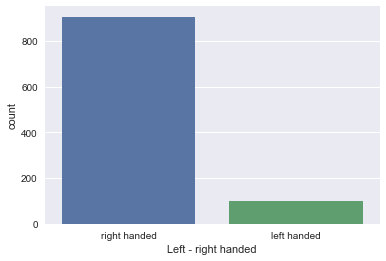

In [76]:
sns.countplot(x = data['Left - right handed'], data = data)
df = pd.crosstab(index=data["Left - right handed"], columns=data["Education"], margins=True)
display(df)


** Relacion entre Educacion y Lateralidad **

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

sns.countplot(x = data['Education'], data = data, ax = ax[0])
sns.countplot(x = data['Education'], hue = 'Left - right handed', data = data, ax = ax[1])

**Porcentajes de nivel de estudio y lateralidad**

In [78]:
d ={'college/bachelor degree': [17.8, 21.3], 'currently a primary school pupil': [1, 1], 'doctorate degree': [3, 0.2], 'masters degree': [8.9, 7.8], 'primary school': [10.9, 7.6], 'secondary school': [58.4, 62]}
df2 = pd.DataFrame(data=d, index=['left handed','right handed'])
display(df2)

college/bachelor degree  currently a primary school pupil  \
left handed                      17.8                                 1   
right handed                     21.3                                 1   

              doctorate degree  masters degree  primary school  \
left handed                3.0             8.9            10.9   
right handed               0.2             7.8             7.6   

              secondary school  
left handed               58.4  
right handed              62.0

**Distribución porcentual de nivel de estudio y lateralidad**

In [79]:
df2.plot(kind='bar', title='Distribución porcentual de nivel de estudio y lateralidad', figsize=(15,7),rot=0)